In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from keras.datasets import mnist
import cv2

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Convolutional neural network with ReLu activation and Adam optimizer from:
"CNN Model for Image Classification on MNIST and Fashion-MNIST Dataset" by Kadam, Shivam S. et. al. published in Journal of Scientific Research Volume 64, Issue 2, 2020

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(28, 28, 1)),

    tf.keras.layers.Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Dropout(rate=0.25),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Dropout(rate=0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Softmax()
])

model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.00005),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

training_history = model.fit(np.stack(x_train), y_train, validation_split=0.1, epochs=20)

Epoch 1/20
1688/1688 [==============================] - 24s 14ms/step - loss: 0.6274 - accuracy: 0.7997 - val_loss: 0.1257 - val_accuracy: 0.9638
Epoch 2/20
1688/1688 [==============================] - 25s 15ms/step - loss: 0.1936 - accuracy: 0.9401 - val_loss: 0.0819 - val_accuracy: 0.9772
Epoch 3/20
1688/1688 [==============================] - 26s 15ms/step - loss: 0.1378 - accuracy: 0.9566 - val_loss: 0.0625 - val_accuracy: 0.9812
Epoch 4/20
1688/1688 [==============================] - 27s 16ms/step - loss: 0.1088 - accuracy: 0.9663 - val_loss: 0.0559 - val_accuracy: 0.9830
Epoch 5/20
1688/1688 [==============================] - 25s 15ms/step - loss: 0.0908 - accuracy: 0.9710 - val_loss: 0.0467 - val_accuracy: 0.9868
Epoch 6/20
1688/1688 [==============================] - 27s 16ms/step - loss: 0.0808 - accuracy: 0.9752 - val_loss: 0.0425 - val_accuracy: 0.9865
Epoch 7/20
1688/1688 [==============================] - 29s 17ms/step - loss: 0.0715 - accuracy: 0.9775 - val_loss: 0.0390 -

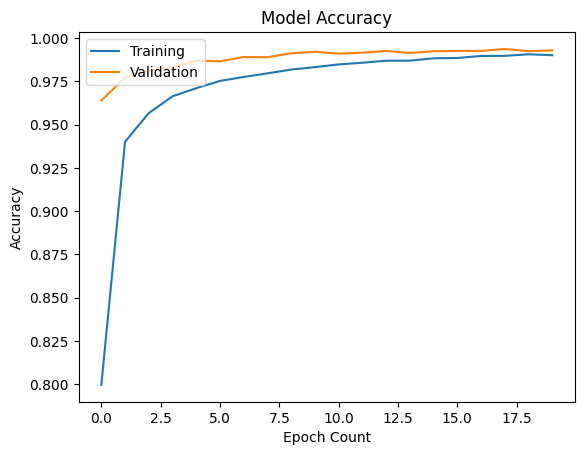

In [5]:
# Plot training metrics
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch Count')
plt.legend(['Training', "Validation"], loc='upper left')
plt.show()

313/313 [==============================] - 2s 6ms/step
loss= 0.016412585973739624
accuracy= 0.9945999979972839
7 2 1 0 4 1 4 9 5 9 
0 6 9 0 1 5 9 7 3 4 
9 6 6 5 4 0 7 4 0 1 
3 1 3 4 7 2 7 1 2 1 
1 7 4 2 3 5 1 2 4 4 
6 3 5 5 6 0 4 1 9 5 
7 8 9 3 7 4 6 4 3 0 
7 0 2 9 1 7 3 2 9 7 
7 6 2 7 8 4 7 3 6 1 
3 6 9 3 1 4 1 7 6 9 


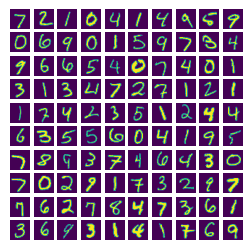

In [6]:
# Predictions on test set
predictions_vector = model.predict(np.stack(x_test))
predictions = [np.argmax(arr) for arr in predictions_vector]

score = model.evaluate(x_test, y_test, verbose=0)
print('loss=', score[0])
print('accuracy=', score[1])

# Display images and validation set results
ROWS = 10
COLS = 10

# Create subplot for display
fig, ax = plt.subplots(nrows=ROWS, ncols=COLS, figsize=(3,3))
np.vectorize(lambda axis : axis.axis("off"))(ax) # Turn of axis labels

images = [Image.fromarray(arr) for arr in x_test]

# Display images of test set
img_count = 0
for i in range(ROWS):
    for j in range(COLS):        
        if img_count < len(images):
            ax[i, j].imshow(images[img_count])
            img_count+=1

# Display predictions on test set set
value_count = 0
for i in range(ROWS):
    for j in range(COLS):
        if value_count < len(predictions):
            print(predictions[value_count], end=' ')
            value_count += 1
    print('')

1/1 [==============================] - 0s 10ms/step
7


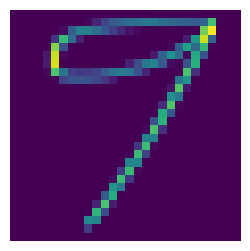

In [7]:
img_path = "./testimg/9.png"

img = Image.open(img_path).convert('L')
img = img.resize((28, 28))

# Convert so white 255 becomes black 0
arr = np.array(img)
for i in range(28):
    for j in range(28):
        arr[i, j] = 255 - arr[i, j]
img = Image.fromarray(arr)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
np.vectorize(lambda axis : axis.axis("off"))(ax) # Turn of axis labels
ax.imshow(img)

print(np.argmax(model.predict(np.stack([np.asarray(img)]))))


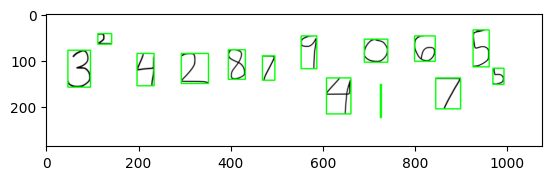

1/1 [==============================] - 0s 11ms/step


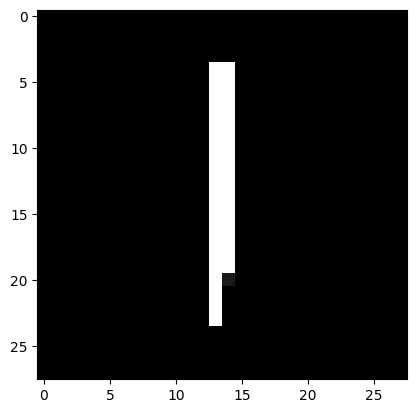

Predicted digit: 1
Probabilities from neural net: [[3.5295378e-07 9.9993515e-01 3.1794343e-07 7.4389828e-09 4.3807042e-05
  3.5375209e-07 3.9894085e-06 2.9005773e-06 1.1457661e-05 1.7076643e-06]]
1/1 [==============================] - 0s 9ms/step


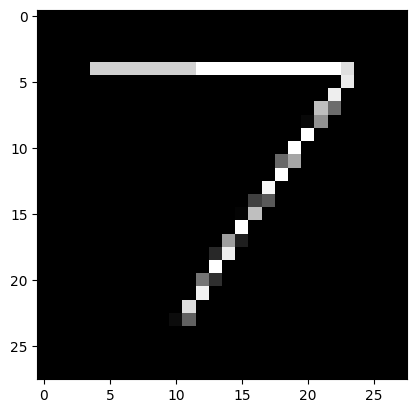

Predicted digit: 7
Probabilities from neural net: [[1.11389242e-03 7.20287394e-03 1.77163854e-01 2.37876084e-02
  3.23911139e-04 7.48282822e-04 1.17001124e-04 7.75767863e-01
  7.37071410e-03 6.40412653e-03]]
1/1 [==============================] - 0s 9ms/step


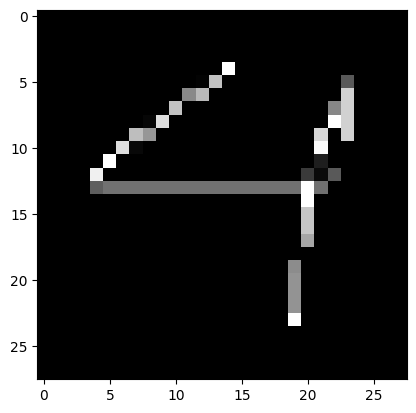

Predicted digit: 5
Probabilities from neural net: [[0.00323861 0.01182547 0.00926844 0.0226545  0.13592246 0.3026224
  0.00329106 0.28805146 0.06237626 0.16074939]]
1/1 [==============================] - 0s 9ms/step


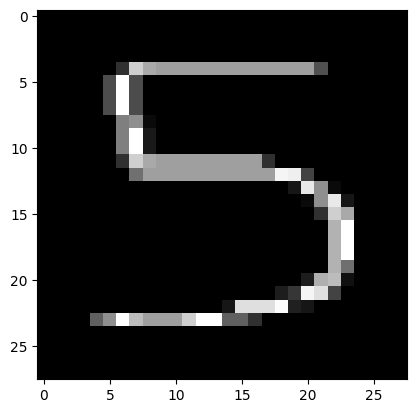

Predicted digit: 5
Probabilities from neural net: [[5.3354429e-06 2.8952045e-05 1.4870142e-07 3.4197283e-04 3.8197154e-06
  9.9809200e-01 6.5621125e-06 1.3857047e-03 4.1368476e-05 9.4185598e-05]]
1/1 [==============================] - 0s 12ms/step


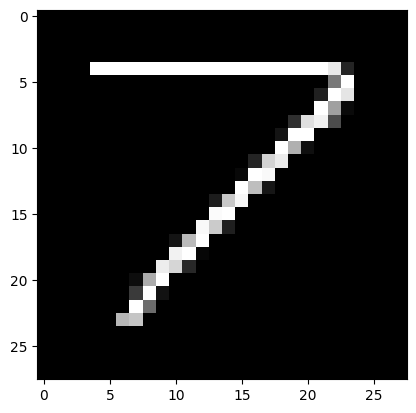

Predicted digit: 7
Probabilities from neural net: [[7.8410048e-06 6.1851658e-02 6.8836257e-02 1.3395459e-03 1.9827899e-05
  6.6219586e-06 3.2529597e-06 8.6421221e-01 3.2767698e-03 4.4600375e-04]]
1/1 [==============================] - 0s 13ms/step


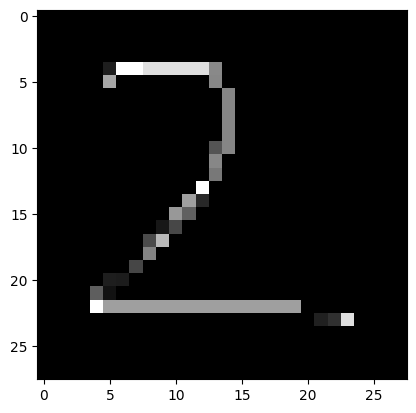

Predicted digit: 2
Probabilities from neural net: [[6.4560649e-04 7.0028730e-02 9.0258920e-01 2.1633154e-02 1.8556895e-04
  1.8778324e-04 1.2715007e-04 7.9298456e-04 3.6454075e-03 1.6441861e-04]]
1/1 [==============================] - 0s 11ms/step


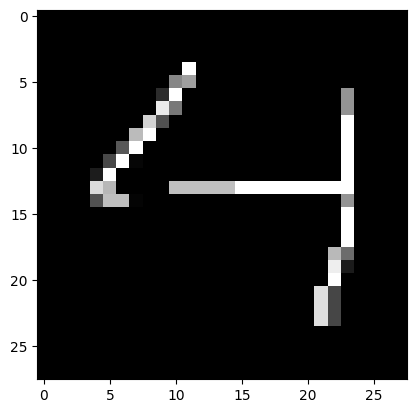

Predicted digit: 4
Probabilities from neural net: [[2.1730813e-04 8.0654380e-04 4.3368712e-03 2.2634461e-03 4.9276617e-01
  1.7176224e-01 1.1001005e-03 2.9805335e-01 2.2382583e-02 6.3113323e-03]]
1/1 [==============================] - 0s 10ms/step


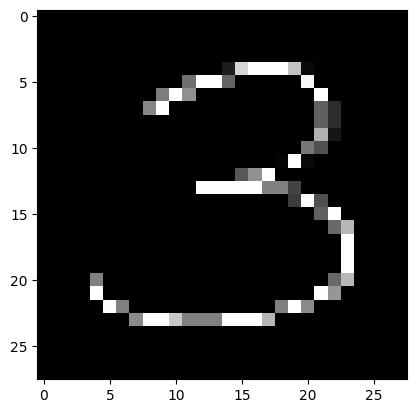

Predicted digit: 3
Probabilities from neural net: [[2.9719532e-08 8.6671798e-06 2.5351575e-05 9.9900061e-01 4.5289653e-08
  9.1392797e-04 2.1768514e-07 7.8292851e-06 2.8337692e-05 1.4904858e-05]]
1/1 [==============================] - 0s 11ms/step


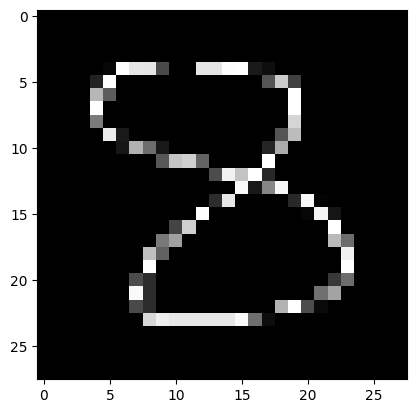

Predicted digit: 8
Probabilities from neural net: [[2.64763494e-05 1.79553055e-04 1.49417728e-01 2.81804614e-02
  2.17946617e-05 1.28909043e-04 3.92520960e-05 9.90565386e-05
  8.21804583e-01 1.02187085e-04]]
1/1 [==============================] - 0s 10ms/step


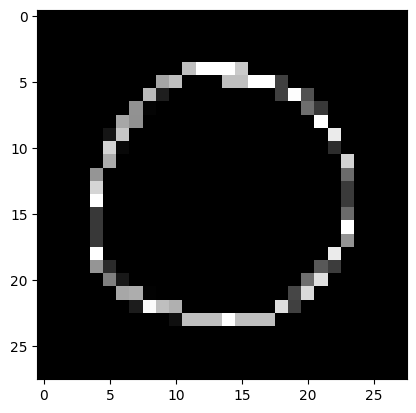

Predicted digit: 0
Probabilities from neural net: [[7.9543537e-01 5.4346654e-03 3.5268117e-02 1.0031250e-01 3.5290628e-05
  2.4484729e-02 6.1468146e-04 6.0830754e-04 2.1629813e-03 3.5643328e-02]]
1/1 [==============================] - 0s 10ms/step


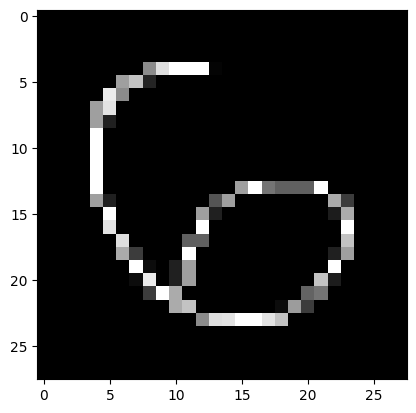

Predicted digit: 6
Probabilities from neural net: [[4.5060623e-03 7.3898106e-04 2.1892009e-02 2.6286116e-02 1.0593539e-04
  1.5416274e-02 8.5351044e-01 1.3819123e-04 7.7070877e-02 3.3500613e-04]]
1/1 [==============================] - 0s 9ms/step


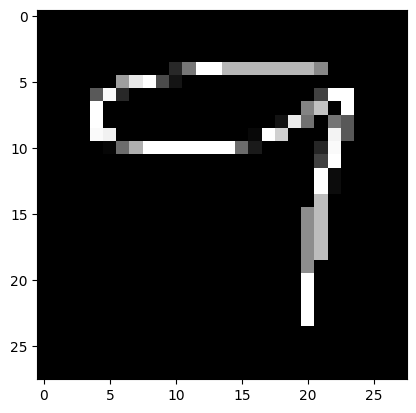

Predicted digit: 7
Probabilities from neural net: [[2.1755674e-05 3.3756827e-05 5.9361529e-04 3.1787559e-04 4.7701420e-04
  2.0464294e-04 2.8065332e-07 9.8836821e-01 4.7110242e-04 9.5117083e-03]]
1/1 [==============================] - 0s 9ms/step


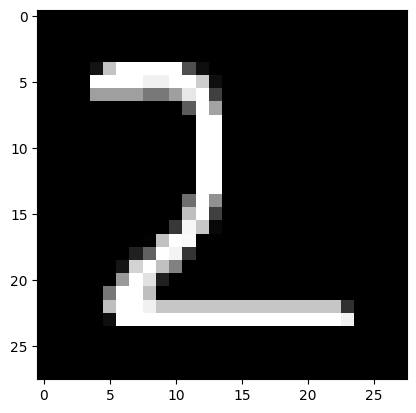

Predicted digit: 2
Probabilities from neural net: [[4.0197484e-08 1.4267546e-04 9.9983549e-01 1.2823650e-08 1.1983997e-09
  1.0708932e-10 6.5222383e-10 2.7376443e-09 2.1791508e-05 1.7464986e-11]]
1/1 [==============================] - 0s 10ms/step


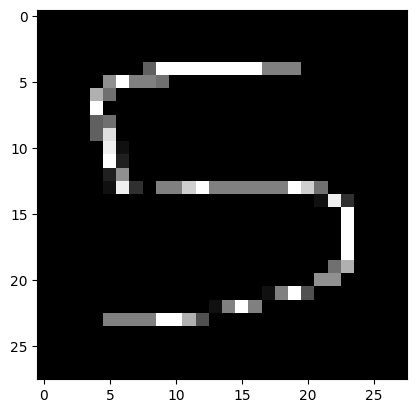

Predicted digit: 5
Probabilities from neural net: [[6.9239890e-05 2.1461446e-03 4.0219747e-04 1.0379004e-01 1.2464974e-04
  8.7394142e-01 2.8962098e-04 1.4570907e-02 1.6354240e-03 3.0303861e-03]]


In [24]:
image = cv2.imread('./testimg/digits2.png')
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

preprocessed_digits = []
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating bounding box
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    
    # Cropping out the digit from the image
    digit = thresh[y:y+h, x:x+w]
    
    # Resize image, but don't disproportionately scale it
    resized_width = min(20, int(1.25 * w))
    resized_height = min(20, int(1.25 * h))
    if resized_width % 2 == 1: resized_width += 1 # Must scale to even number so padding is same on both sides
    if resized_height % 2 == 1: resized_height += 1 # Must scale to even number so padding is same on both sides
    resized_digit = cv2.resize(digit, (resized_width, resized_height))
    

    remaining_pad_width = (28 - resized_width) // 2
    remaining_pad_height = (28 - resized_height) // 2
    padded_digit = np.pad(resized_digit, ((remaining_pad_height, remaining_pad_height),(remaining_pad_width, remaining_pad_width)), "constant", constant_values=0)

    preprocessed_digits.append(padded_digit)

plt.imshow(image, cmap="gray")
plt.show()
    

for digit in preprocessed_digits:
    prediction = model.predict(digit.reshape(1, 28, 28, 1))  
    
    plt.imshow(digit.reshape(28, 28), cmap="gray")
    plt.show()
    print("Predicted digit: {}".format(np.argmax(prediction)))
    print ("Probabilities from neural net: {}".format(prediction))